Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

## Contributors:
### Lukas Andersson - 17 Hours
### Ramapriya Navalpakkam - XX Hours

In [1]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


In [4]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.8171 - accuracy: 0.7637 - val_loss: 0.2565 - val_accuracy: 0.9252
Epoch 2/10
469/469 [==============================] - 0s 560us/step - loss: 0.2453 - accuracy: 0.9285 - val_loss: 0.1933 - val_accuracy: 0.9415
Epoch 3/10
469/469 [==============================] - 0s 553us/step - loss: 0.1865 - accuracy: 0.9462 - val_loss: 0.1679 - val_accuracy: 0.9493
Epoch 4/10
469/469 [==============================] - 0s 556us/step - loss: 0.1509 - accuracy: 0.9567 - val_loss: 0.1374 - val_accuracy: 0.9597
Epoch 5/10
469/469 [==============================] - 0s 562us/step - loss: 0.1308 - accuracy: 0.9623 - val_loss: 0.1266 - val_accuracy: 0.9607
Epoch 6/10
469/469 [==============================] - 0s 552us/step - loss: 0.1135 - accuracy: 0.9669 - val_loss: 0.1182 - val_accuracy: 0.9628
Epoch 7/10
469/469 [==============================] - 0s 528us/step - loss: 0.0991 - accuracy: 0.9723 - val_loss: 0.1030 - val_accuracy: 0

## 3
### a

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4420 - accuracy: 0.8647 - val_loss: 0.1181 - val_accuracy: 0.9664
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1057 - accuracy: 0.9701 - val_loss: 0.0860 - val_accuracy: 0.9739
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0726 - accuracy: 0.9798 - val_loss: 0.0691 - val_accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0565 - accuracy: 0.9840 - val_loss: 0.0572 - val_accuracy: 0.9812
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0418 - accuracy: 0.9880 - val_loss: 0.0488 - val_accuracy: 0.9830
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.0549 - val_accuracy: 0.9824
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.0461 - val_accuracy: 0.9847

### Layers
First we have a convolutional layer, a max pooling layer and flatten it out to find and provide features that we then can examine to get a result. We then have a dense layer and one output layer with 10 nodes that uses the softmax activation function that decides between the 10 nodes. Did not quite reach 99% accuracy, 98.6 is the best run so far.

### b
Convolutional layers outperform fully connected layers in this case, image classification. When working with images convolutional layers are really good since what they do is detecting features on a low level and then base classifications on those found features. It is very good at finding similiar patterns or features in new pictures, meaning that you can train it with a lot of pictures with the same object in it and then feed it with a new image of the same object. It will then find those features that makes that object special and remember it from before classifying it correctly.

### Question 4) Auto-Encoder for denoising


## 4
### a

In [6]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [7]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 1s 1ms/step - loss: 0.2392 - val_loss: 0.1521
Epoch 2/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1484 - val_loss: 0.1393
Epoch 3/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1375 - val_loss: 0.1333
Epoch 4/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1322 - val_loss: 0.1301
Epoch 5/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1284 - val_loss: 0.1276
Epoch 6/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1263 - val_loss: 0.1265
Epoch 7/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1244 - val_loss: 0.1257
Epoch 8/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1232 - val_loss: 0.1243
Epoch 9/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1218 - val_loss: 0.1235
Epoch 10/32
938/938 [==============================] - 1s 1ms/step - loss: 0.1209 - val_loss: 0.1233

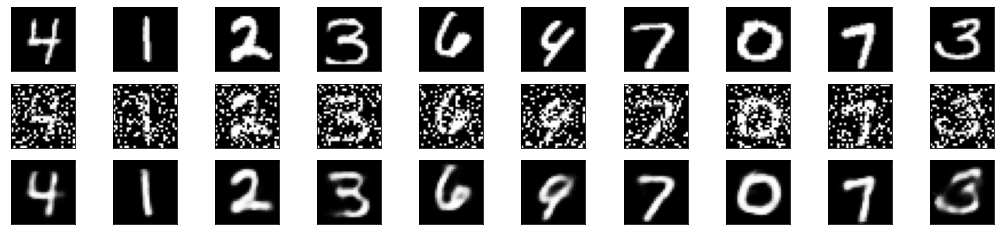

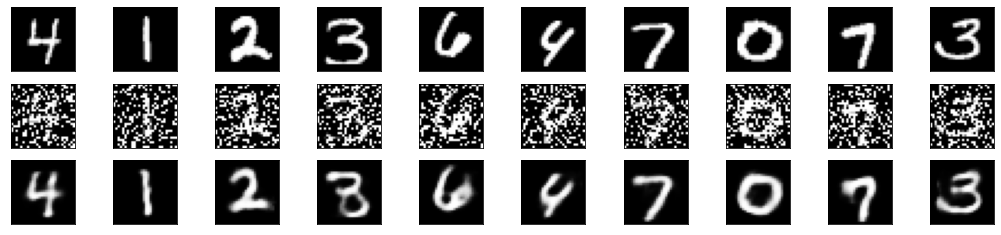

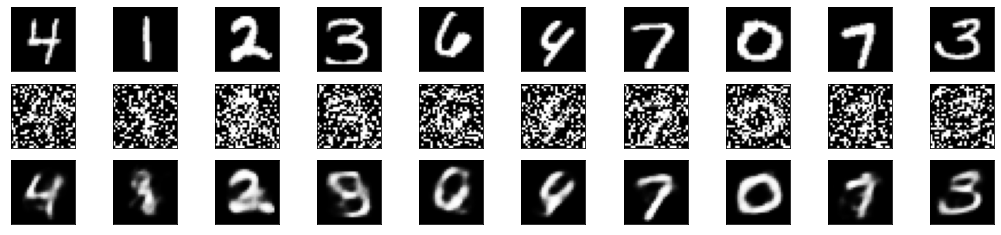

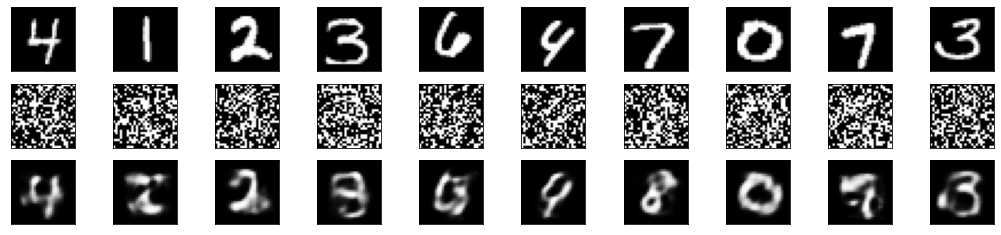

In [9]:
num_images = 10
np.random.seed(45)
random_test_images = np.random.randint(flattened_x_train.shape[0], size=num_images)

seasoned_imgs = []
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.4))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.5))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.6))
seasoned_imgs.append(salt_and_pepper(flattened_x_train, noise_level=0.7))

for seasoned in seasoned_imgs:

    decoded_imgs = autoencoder.predict(seasoned)
    
    plt.figure(figsize=(18, 4))

    for i, image_idx in enumerate(random_test_images):
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(flattened_x_train[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(seasoned[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, num_images, 2*num_images + i + 1)
        plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

### b

I have problem seeing the seasoned picture after 0.4, so in all 3 bottom examples. For the denoising it seems like it starts to get some weird results from 0.6, but very few. At 0.7 however there is a lot of problems and the majority of the pictures are ruined, We would therefore suggest that denoising works at 0.6 but stops working at 0.7

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.7028 - accuracy: 0.8110 - val_loss: 0.4042 - val_accuracy: 0.8651
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3226 - accuracy: 0.8961 - val_loss: 0.3387 - val_accuracy: 0.8852
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2496 - accuracy: 0.9198 - val_loss: 0.3107 - val_accuracy: 0.8974
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1990 - accuracy: 0.9375 - val_loss: 0.3113 - val_accuracy: 0.8986
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1614 - accuracy: 0.9502 - val_loss: 0.3188 - val_accuracy: 0.8984
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1255 - accuracy: 0.9632 - val_loss: 0.3235 - val_accuracy: 0.8967
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0979 - accuracy: 0.9717 - val_loss: 0.3667 - val_accuracy: 0.8926

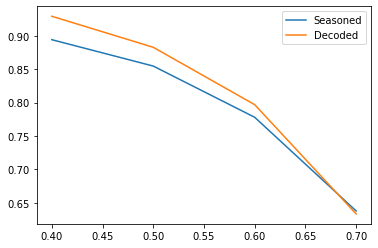

In [10]:
noise = [0.4, 0.5, 0.6, 0.7]

result_season = []
result_decoded = []

for i in noise:
    
    seasoned_train = salt_and_pepper(flattened_x_train, noise_level=i) 
    seasoned_test = salt_and_pepper(flattened_x_test, noise_level=i) 
    decoded_train = autoencoder.predict(seasoned_train)
    decoded_test = autoencoder.predict(seasoned_test)

    fit_info = model.fit(seasoned_train.reshape(-1, 28, 28, 1), y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(seasoned_test.reshape(-1, 28, 28, 1), y_test))
    score = model.evaluate(seasoned_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
    result_season.append(score[1])
    
    fit_info = model.fit(decoded_train.reshape(-1, 28, 28, 1), y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(decoded_test.reshape(-1, 28, 28, 1), y_test))
    score = model.evaluate(decoded_test.reshape(-1, 28, 28, 1), y_test, verbose=0)
    result_decoded.append(score[1])
    

plt.plot(noise, result_season, label = "Seasoned")
plt.plot(noise, result_decoded, label = "Decoded")
plt.legend()
plt.show()

### c
The decoded version is better all the way until 0.7 where seasoned is better. However that was the point where the decoder stopped working, so it is in fact better as long as it works.